In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Importing the libraries

In [ ]:
!pip install boruta

In [ ]:
import pandas as pd
import seaborn as sp
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from boruta import BorutaPy
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
ckd = pd.read_csv('/content/drive/MyDrive/Mini - Project/Dataset/kidney_disease.csv')
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
ckd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# DATA CLEANING

In [ ]:
ckd['age'].fillna(ckd['age'].median(), inplace = True)
ckd['bp'].fillna(ckd['bp'].median(), inplace = True)
ckd['sc'].fillna(ckd['sc'].median(), inplace = True)
ckd['rbc'].fillna(ckd['rbc'].mode()[0], inplace = True)
ckd['pc'].fillna(ckd['pc'].mode()[0], inplace = True)
ckd['al'].fillna(ckd['al'].mode()[0], inplace = True)
ckd['su'].fillna(ckd['su'].mode()[0], inplace = True)
ckd['pcc'].fillna(ckd['pcc'].mode()[0], inplace = True)
ckd['htn'].fillna(ckd['htn'].mode()[0], inplace = True)
ckd['dm'].fillna(ckd['dm'].mode()[0], inplace = True)
ckd['cad'].fillna(ckd['cad'].mode()[0], inplace = True)
ckd['sg'].fillna(ckd['sg'].mode()[0], inplace = True)
ckd['ba'].fillna(ckd['ba'].mode()[0], inplace = True)
ckd['appet'].fillna(ckd['appet'].mode()[0], inplace = True)
ckd['pe'].fillna(ckd['pe'].mode()[0], inplace = True)
ckd['ane'].fillna(ckd['ane'].mode()[0], inplace = True)

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              400 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## KNN Imputation

In [ ]:
# Select the column to impute
column_name = 'hemo'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              400 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Select the column to impute
column_name = 'bgr'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
# Select the column to impute
column_name = 'bu'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Select the column to impute
column_name = 'sod'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
# Select the column to impute
column_name = 'pot'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Convert non - numeric data to Nan

In [ ]:
import numpy as np

# Assuming 'attribute' is the name of the attribute/column
attribute_values = ckd['rc']

numeric_values = pd.to_numeric(attribute_values, errors='coerce')

# Replace non-numeric values with NaN
ckd['rc'] = np.where(pd.to_numeric(attribute_values, errors='coerce').notnull(), attribute_values, np.nan)


In [ ]:
# Select the column to impute
column_name = 'rc'

imputer = KNNImputer(n_neighbors=5)

imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc        rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.200000  yes  yes   no  good   no   n

In [ ]:
# Assuming 'attribute' is the name of the attribute/column
attribute_values = ckd['wc']

# Convert non-numeric values to NaN
numeric_values = pd.to_numeric(attribute_values, errors='coerce')

# Replace non-numeric values with NaN
ckd['wc'] = np.where(pd.to_numeric(attribute_values, errors='coerce').notnull(), attribute_values, np.nan)


In [ ]:
# Select the column to impute
column_name = 'wc'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv      wc        rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800.0  5.200000  yes  yes   no  good   no

In [ ]:
ckd.shape

(400, 26)

In [ ]:
attribute_values = ckd['pcv']

numeric_values = pd.to_numeric(attribute_values, errors='coerce')

# Replace non-numeric values with NaN
ckd['pcv'] = np.where(pd.to_numeric(attribute_values, errors='coerce').notnull(), attribute_values, np.nan)


In [ ]:
# Select the column to impute
column_name = 'pcv'

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_values = imputer.fit_transform(ckd[column_name].values.reshape(-1, 1))

# Assign imputed values back to the original dataset
ckd[column_name] = imputed_values.flatten()

# Print the updated dataset with imputed values
print(ckd)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc        rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.200000  yes  yes   no   good 

In [ ]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

# Class Distribution

In [ ]:
ckd['classification'] = ckd['classification'].replace('ckd\t', 'ckd')

# Print the updated dataset
print(ckd)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc        rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.200000  yes  yes   no   good 

ckd       62.5
notckd    37.5
Name: classification, dtype: float64


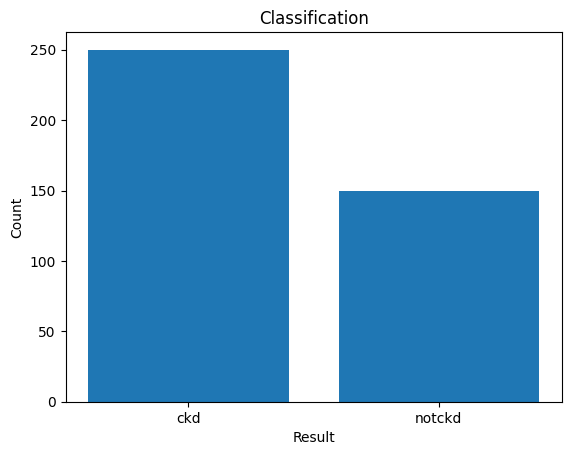

In [ ]:
#Class Distribution
class_counts_typ = ckd['classification'].value_counts()

class_distribution_typ =class_counts_typ / len(ckd) *100

print(class_distribution_typ)

#plot a bar graph
value = ckd['classification'].value_counts()

plt.bar(value.index, value.values)

plt.title('Classification')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

# Data Transformation

In [ ]:
# Select the features to be label encoded
features_to_encode = ['rbc', 'pc']

# Perform label encoding
label_encoder = LabelEncoder()
for feature in features_to_encode:
    ckd[feature] = label_encoder.fit_transform(ckd[feature])

# Print the transformed dataset
print(ckd[features_to_encode])


     rbc  pc
0      1   1
1      1   1
2      1   1
3      1   0
4      1   1
..   ...  ..
395    1   1
396    1   1
397    1   1
398    1   1
399    1   1

[400 rows x 2 columns]


In [ ]:
# Select the features to be label encoded
features_to_encode = ['pcc', 'ba']
# Perform label encoding
label_encoder = LabelEncoder()
for feature in features_to_encode:
    ckd[feature] = label_encoder.fit_transform(ckd[feature])

# Print the transformed dataset
print(ckd[features_to_encode])

     pcc  ba
0      0   0
1      0   0
2      0   0
3      1   0
4      0   0
..   ...  ..
395    0   0
396    0   0
397    0   0
398    0   0
399    0   0

[400 rows x 2 columns]


In [ ]:
# Select the features to be label encoded
features_to_encode = ['htn', 'dm','cad','appet','pe','ane','classification']
# Perform label encoding
label_encoder = LabelEncoder()
for feature in features_to_encode:
    ckd[feature] = label_encoder.fit_transform(ckd[feature])

# Print the transformed dataset
print(ckd[features_to_encode])

     htn  dm  cad  appet  pe  ane  classification
0      1   4    1      0   0    0               0
1      0   3    1      0   0    0               0
2      0   4    1      1   0    1               0
3      1   3    1      1   1    1               0
4      0   3    1      0   0    0               0
..   ...  ..  ...    ...  ..  ...             ...
395    0   3    1      0   0    0               1
396    0   3    1      0   0    0               1
397    0   3    1      0   0    0               1
398    0   3    1      0   0    0               1
399    0   3    1      0   0    0               1

[400 rows x 7 columns]


In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

# Normalization

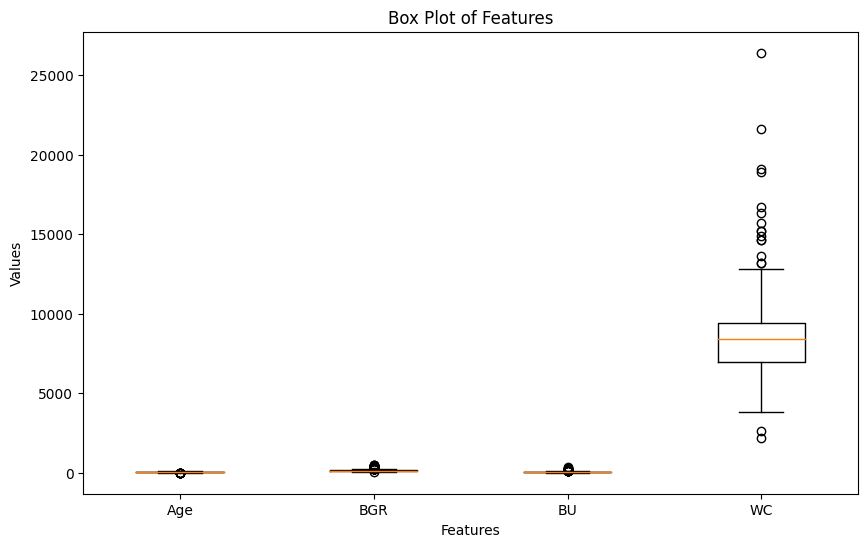

Outliers in Age:
[  1  75 131 150 185 186 187 188 190 215]
Outliers in BGR:
[  2   7  10  11  18  27  35  53  58  67  69  70  81  86  88  90  93  99
 103 107 109 111 120 125 128 137 140 147 153 154 158 159 168 170 172 173
 175 180 184 189 198 207 208 210 212 219 221 223 225 229 231 244 248]
Outliers in BU:
[ 15  20  21  22  30  34  43  50  56  57  58  61  76  84 103 106 122 126
 127 128 130 132 133 142 143 145 153 154 174 177 178 184 191 193 196 210
 212 229 238 246 249]
Outliers in WC:
[ 48  49  71  88 107 123 127 130 132 147 153 167 181 190 193 198 229]


In [ ]:
## Outliers detection
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a pandas DataFrame named 'ckd' with the relevant features

# Create a box plot for each feature
plt.figure(figsize=(10, 6))
plt.boxplot([ckd['age'], ckd['bgr'], ckd['bu'], ckd['wc']], labels=['Age', 'BGR', 'BU', 'WC'])
plt.title('Box Plot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

# Define a function to identify outliers based on the box plot
def identify_outliers(feature, feature_name):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (feature < lower_bound) | (feature > upper_bound)

    print('Outliers in {}:'.format(feature_name))
    print(np.where(outliers)[0])

# Identify outliers for each feature
identify_outliers(ckd['age'], 'Age')
identify_outliers(ckd['bgr'], 'BGR')
identify_outliers(ckd['bu'], 'BU')
identify_outliers(ckd['wc'], 'WC')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a pandas DataFrame named 'ckd' with the relevant attributes

# Select the attributes to normalize
attributes = ['age', 'bgr', 'bu', 'wc']

# Create a new DataFrame to store the normalized values
normalized_data = pd.DataFrame()

# Perform min-max normalization
scaler = MinMaxScaler()
normalized_data[attributes] = scaler.fit_transform(ckd[attributes])

# View the normalized data
print(normalized_data.head())


        age       bgr        bu        wc
0  0.522727  0.211538  0.088575  0.231405
1  0.056818  0.269309  0.042362  0.157025
2  0.681818  0.856838  0.132221  0.219008
3  0.522727  0.202991  0.139923  0.185950
4  0.556818  0.179487  0.062901  0.210744


#Splitting the Dataset

In [ ]:
X = ckd.drop('classification', axis=1)
y = ckd['classification']

In [ ]:
print(X)

      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  hemo   pcv  \
0      0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  15.4  44.0   
1      1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  11.3  38.0   
2      2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   9.6  31.0   
3      3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  11.2  32.0   
4      4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  11.6  35.0   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...   ...   ...   
395  395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.7  47.0   
396  396  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...  16.5  54.0   
397  397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.8  49.0   
398  398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...  14.2  51.0   
399  399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...  15.8  53.0   

         wc        rc  htn  dm  cad  appet  pe  ane  
0    7800.0  5.200000    1   4   

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64


# Data Balancing

In [ ]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_data = X_resampled.copy()
resampled_data['classification'] = y_resampled

ckd = resampled_data

In [ ]:
X_resampled.shape

(500, 25)

In [ ]:
y_resampled.shape

(500,)

In [ ]:
ckd.shape

(500, 26)

In [ ]:
ckd.head()

0    50.0
1    50.0
Name: classification, dtype: float64


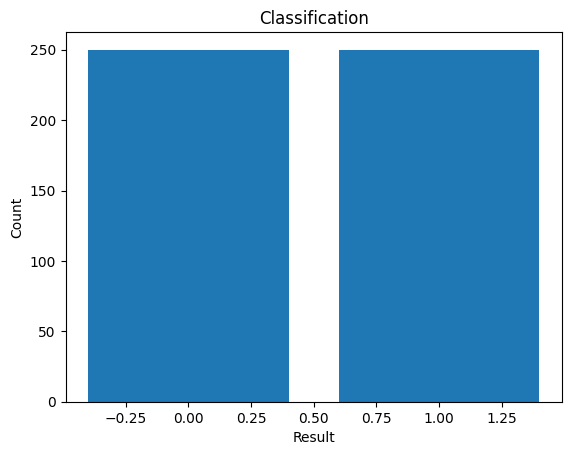

In [ ]:
#Class Distribution
class_counts_typ = ckd['classification'].value_counts()

class_distribution_typ =class_counts_typ / len(ckd) *100

print(class_distribution_typ)

#plot a bar graph
value = ckd['classification'].value_counts()

plt.bar(value.index, value.values)

plt.title('Classification')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

#Drop unnecessary feature

In [ ]:
ckd.drop('id', axis = 1, inplace = True)

In [ ]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,3,1,0,0,0,0


# BORUTA

In [ ]:
X = ckd.iloc[:, :-1].values
y = ckd.iloc[:, -1].values

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

# Define the Boruta feature selection method
boruta = BorutaPy(rf, n_estimators='auto', verbose=2)

# Perform feature selection
boruta.fit(X, y)

# Print the selected features
selected_features = ckd.columns[:-1][boruta.support_].tolist()
print("Selected features:", selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	8
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	8
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	8
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	13
Tentative: 	8
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	14
Tentative: 	7
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	14
Tentative: 	7
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	14
Tentative: 	7
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	14
Tentative: 	7
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	3
I

## K - NN

In [ ]:
# Use consensus selected features with your classifier
x_selected = ckd[selected_features]

# Create the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation with 10 folds
scores = cross_val_score(knn, x_selected, y, cv=10)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print("Fold {}: Accuracy = {:.4f}".format(i, score))

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = scores.mean()

# Print the results
print("Accuracy for K-NN: %0.4f" % (mean_accuracy))


Fold 1: Accuracy = 0.8750
Fold 2: Accuracy = 0.8750
Fold 3: Accuracy = 0.9000
Fold 4: Accuracy = 0.8500
Fold 5: Accuracy = 0.8000
Fold 6: Accuracy = 0.9500
Fold 7: Accuracy = 0.8500
Fold 8: Accuracy = 0.8750
Fold 9: Accuracy = 0.8750
Fold 10: Accuracy = 0.9250
Accuracy for K-NN: 0.8775


## Naive Bayesian

In [ ]:
nb = GaussianNB()

# Perform cross-validation with 10 folds
scores = cross_val_score(nb, x_selected, y, cv=10)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print("Fold {}: Accuracy = {:.4f}".format(i, score))

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = scores.mean()

# Print the results
print("Accuracy for Naive Bayesian: %0.4f" % (mean_accuracy))


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 0.9750
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 0.8500
Fold 6: Accuracy = 0.9750
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 0.9500
Fold 9: Accuracy = 0.8750
Fold 10: Accuracy = 1.0000
Accuracy for Naive Bayesian: 0.9625


## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 5000, random_state=42)

# Perform cross-validation with 10 folds
scores = cross_val_score(lr, x_selected, y, cv=10)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print("Fold {}: Accuracy = {:.4f}".format(i, score))

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = scores.mean()

# Print the results
print("Accuracy for Logistic Regression: %0.4f" % (mean_accuracy))


Fold 1: Accuracy = 0.9750
Fold 2: Accuracy = 0.9750
Fold 3: Accuracy = 0.9500
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 0.9500
Fold 6: Accuracy = 0.9750
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 0.9500
Fold 10: Accuracy = 1.0000
Accuracy for Logistic Regression: 0.9775


## Graph

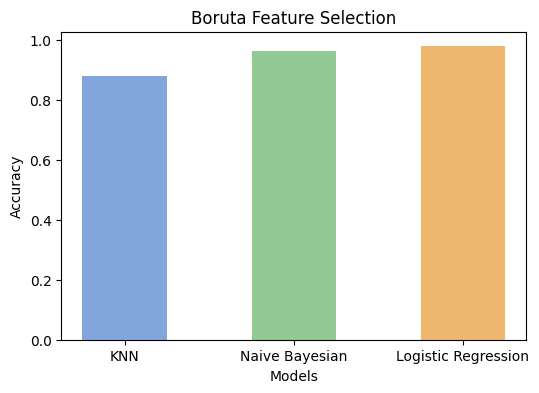

In [ ]:
model_names = ['KNN', 'Naive Bayesian', 'Logistic Regression']
accuracies = [0.8775, 0.9625, 0.9775]

colors = [(0.3, 0.5, 0.8, 0.7), (0.4, 0.7, 0.4, 0.7), (0.9, 0.6, 0.2, 0.7)]
plt.figure(figsize=(6, 4))

# Create the bar graph
plt.bar(model_names, accuracies, color = colors, width = 0.5)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Boruta Feature Selection')

# Display the graph
plt.show()

# RANDOM FOREST FEATURE SELECTION

In [ ]:
X = ckd.drop('classification', axis=1)
y = ckd['classification']

# Use random forest to select the most important features
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)
importance = rfc.feature_importances_
# Create a list of (feature name, importance) tuples and sort by importance
features = list(zip(X.columns, importance))
features.sort(key=lambda x: x[1], reverse=True)

# Print the sorted list of feature importances
for f in features:
    print(f)


# Select the top k features
k = 8
top_features = [f[0] for f in features[:k]]
print("Selected features: ")
for f in top_features:
    print(f)
X = X[top_features]

('hemo', 0.2171136782845692)
('pcv', 0.14926061253706333)
('sg', 0.11813037454638083)
('sc', 0.11433360697608204)
('rc', 0.10986951829010773)
('al', 0.05651810778394792)
('bgr', 0.04741178649275379)
('htn', 0.0465266959683689)
('dm', 0.03679111191150851)
('bu', 0.02161921119753167)
('sod', 0.016866643650787813)
('appet', 0.011284387151993694)
('age', 0.010509590021062488)
('wc', 0.009331974543223279)
('bp', 0.007147158987673393)
('pe', 0.0059291603609054454)
('pc', 0.00545494295110245)
('su', 0.004535614534637299)
('pot', 0.004386325416323913)
('rbc', 0.0038048707067333425)
('ane', 0.001359237077084799)
('pcc', 0.0008542462025414691)
('ba', 0.0007191700502238952)
('cad', 0.00024197435739271834)
Selected features: 
hemo
pcv
sg
sc
rc
al
bgr
htn


##K - NN

In [ ]:
# Train and evaluate the model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
y_preds=[]
y_tests=[]
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the random forest classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Make predictions on the test set and calculate accuracy
    y_pred = knn.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Add accuracy score to list
    accuracy_scores.append(accuracy)

# Compute and print the mean accuracy score and standard deviation
print("Accuracy- K-NN classifier: %0.4f (+/- %0.4f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy- K-NN classifier: 0.9475 (+/- 0.0687)


## Naive Bayesian

In [ ]:
# Train and evaluate the model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
y_preds=[]
y_tests=[]
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # Make predictions on the test set and calculate accuracy
    y_pred = nb.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Add accuracy score to list
    accuracy_scores.append(accuracy)

# Compute and print the mean accuracy score and standard deviation
print("Accuracy Naive Bayesian classifier: %0.4f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy Naive Bayesian classifier: 0.9375 (+/- 0.07)


## LOGISTIC REGRESSION

In [ ]:
# Perform 10-fold cross validation using KFold method
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr = LogisticRegression(C=1, max_iter = 5000)
scores = []
y_preds = []
y_true = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    y_preds.extend(y_pred)
    y_true.extend(y_test)
    scores.append(lr.score(X_test, y_test))


# Calculate and print the cross-validation accuracy
print("Accuracy- Logistic Regression: %0.4f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

------------Accuracy- Logistic Regression: 0.9750 (+/- 0.04)----------


##Graph

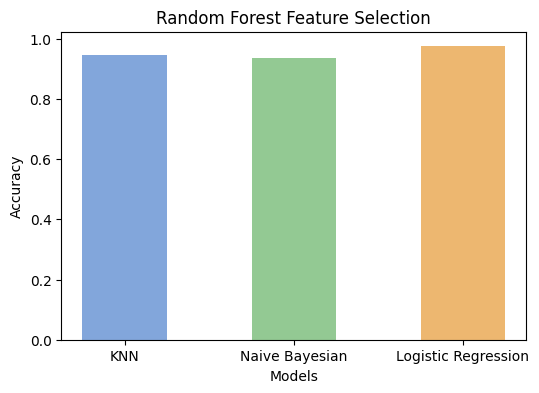

In [ ]:
model_names = ['KNN', 'Naive Bayesian', 'Logistic Regression']
accuracies = [0.9475, 0.9375, 0.9750]

colors = [(0.3, 0.5, 0.8, 0.7), (0.4, 0.7, 0.4, 0.7), (0.9, 0.6, 0.2, 0.7)]
plt.figure(figsize=(6, 4))

# Create the bar graph
plt.bar(model_names, accuracies, color = colors, width=0.5)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Random Forest Feature Selection')

# Display the graph
plt.show()